In [1]:
# configure the path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c cifar-10

 99% 711M/715M [00:05<00:00, 120MB/s]
100% 715M/715M [00:05<00:00, 125MB/s]


In [3]:
!ls

cifar-10.zip  drive  kaggle.json  sample_data


In [4]:
# extraxct the compressed dataset
from zipfile import ZipFile

dataset='/content/cifar-10.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("dataset extracted")

dataset extracted


In [5]:
%ls

cifar-10.zip  kaggle.json   sampleSubmission.csv  train.7z
drive/        sample_data/  test.7z               trainLabels.csv


In [6]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.8 MB/s eta 0:00:00


In [7]:
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall() #archive.extractall(path='path where u want to download ')
archive.close()

In [8]:
%ls

cifar-10.zip  kaggle.json   sampleSubmission.csv  train/    trainLabels.csv
drive/        sample_data/  test.7z               train.7z


Importing all the dependencies

In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [10]:
filename=os.listdir('/content/train')

In [11]:
type(filename)

list

In [12]:
len(filename)

50000

In [13]:
print(filename[:5])
print(filename[-5:])

['12845.png', '36039.png', '7873.png', '15137.png', '24453.png']
['758.png', '13345.png', '29877.png', '21198.png', '15128.png']


Label Preprocessing

In [14]:
label_df=pd.read_csv('/content/trainLabels.csv')

In [15]:
label_df.shape

(50000, 2)

In [16]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
label_df[label_df['id']==9784]

,id,label
9783,9784,cat


In [18]:
label_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
label_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [20]:
label_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [21]:
label_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [22]:
label_dictionary={'airplane':0,'automobile':1,'bird':2, 'cat':3, 'dog':5, 'deer':4, 'frog':6,
                  'horse':7, 'truck':9, 'ship': 8}

In [23]:
labels=[label_dictionary[i] for i in label_df['label']]

In [24]:
print(labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

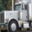

In [25]:
# display samole images
import cv2
from google.colab.patches import cv2_imshow
img= cv2.imread('/content/train/7765.png')
cv2_imshow(img)

In [26]:
label_df[label_df['id']==7765]

,id,label
7764,7765,truck


In [27]:
id_list=list(label_df['id'])

In [28]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [29]:
# convert image ijnto numpy array
train_data_folder='/content/train/'
data=[]
for id in id_list:
  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [30]:
type(data)

list

In [31]:
len(data)

50000

In [32]:
type(data[0])

numpy.ndarray

In [33]:
data[0].shape

(32, 32, 3)

In [34]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [37]:
# convert images and labels to numpy array
X=np.array(data)
Y=np.array(labels)

In [38]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train and testing the data

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [56]:
# scalling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [57]:
X_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

**Building the neural network**

In [58]:
import tensorflow as tf
from tensorflow import keras


In [59]:
from keras.src.layers.serialization import activation
no_of_classes=10

# setting up the layers ofv neural network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(no_of_classes, activation='softmax')
])

In [62]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [63]:
# train the neural network
model.fit(X_train_scaled, y_train, validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 2.0533 - acc: 0.2266 - val_loss: 1.9769 - val_acc: 0.2587
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9433 - acc: 0.2659 - val_loss: 1.9429 - val_acc: 0.2645
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9208 - acc: 0.2742 - val_loss: 1.9027 - val_acc: 0.2817
Epoch 4/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.9083 - acc: 0.2745 - val_loss: 1.8883 - val_acc: 0.2885
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8945 - acc: 0.2843 - val_loss: 1.8905 - val_acc: 0.2968
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8863 - acc: 0.2910 - val_loss: 1.8827 - val_acc: 0.2985
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8830 - acc: 0.2988 - val_loss: 1.8674 - val_acc: 0.3092
Epoch 8/10
1125/1125 [==============================] - 5s 4ms

**ResNet50**

In [65]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout , Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers




In [66]:
convolutional_base=ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [69]:
from keras.src.layers.reshaping.up_sampling2d import UpSampling2D
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes, activation='relu'))




In [70]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [71]:
history=model.fit(X_train_scaled,y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 480s 391ms/step - loss: 6.6123 - acc: 0.1042 - val_loss: 2.4317 - val_acc: 0.1025
Epoch 2/10
1125/1125 [==============================] - 432s 384ms/step - loss: 2.9624 - acc: 0.0969 - val_loss: 2.3653 - val_acc: 0.1013
Epoch 3/10
1125/1125 [==============================] - 439s 390ms/step - loss: 3.1913 - acc: 0.0903 - val_loss: 3.8433 - val_acc: 0.0855
Epoch 4/10
1125/1125 [==============================] - 431s 383ms/step - loss: 2.7785 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1032
Epoch 5/10
1125/1125 [==============================] - 418s 372ms/step - loss: 2.3050 - acc: 0.1004 - val_loss: 2.3026 - val_acc: 0.1032
Epoch 6/10
1125/1125 [==============================] - 425s 378ms/step - loss: 2.3029 - acc: 0.1004 - val_loss: 2.3026 - val_acc: 0.1032
Epoch 7/10
1125/1125 [==============================] - 425s 377ms/step - loss: 2.3033 - acc: 0.1004 - val_loss: 2.3026 - val_acc: 0.1032
Epoch 8/10
1125/1125 [============

In [72]:
loss, accuracy=model.evaluate(X_test_scaled, y_test)
print("test loss",loss)
print("test accuracy",accuracy)

313/313 [==============================] - 38s 117ms/step - loss: 2.3026 - acc: 0.0973
test loss 2.30259108543396
test accuracy 0.09730000048875809


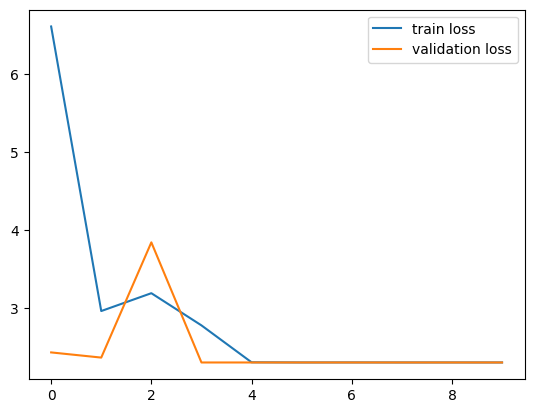

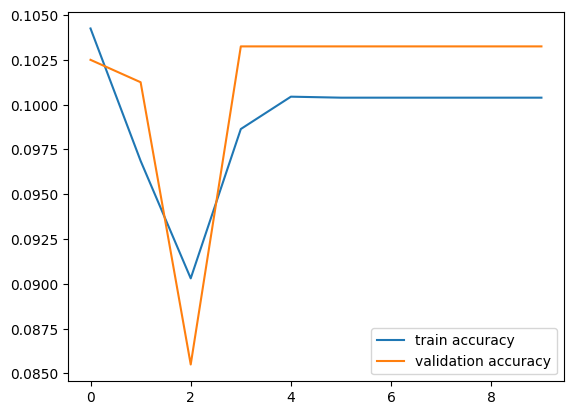

In [73]:
h=history
# plot the loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()